In [1]:
from helpers import * 

In [3]:
s3=s3_connection("aayrapetyan")
df=s3.get_tables_from_s3("aayrapetyan/final_table.parquet")
df.sample(3)

connection successful


,total_voyageurs_2022,code_postal,nom_gare,uic,lon_gare,lat_gare,codecommune,nomcommune,pop2022,revmoy2022,pbac2022,psup2022
141,430759,80330,Longueau,87313049,2.352150,49.863440,80330,FORCEVILLE-EN-VIMEU,229.0,16126.004,0.043478,0.043478
566,66157,56690,Landévant,87476234,-3.125131,47.759578,56097,LANDEVANT,4149.0,15140.015,0.584290,0.379125
633,2628,52170,Chevillon,87175117,5.111784,48.524550,52170,DOMMARIEN,209.0,13014.742,0.385135,0.385135


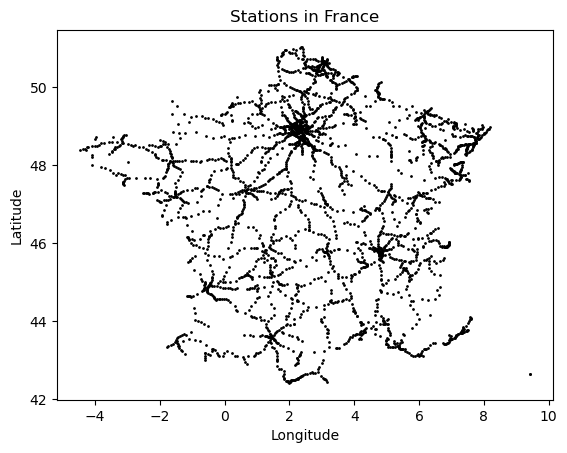

In [4]:
simple_plot_map(lat=df["lat_gare"],lon=df["lon_gare"])

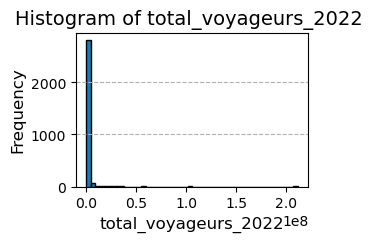

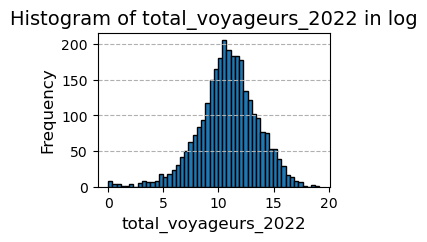

nb removed observations :  24


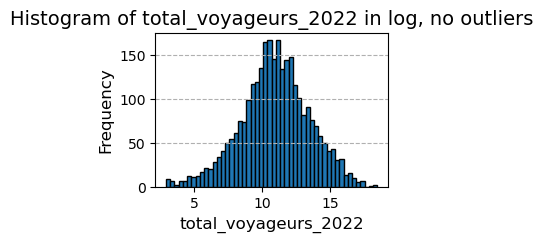

In [5]:
plot_hist(series=(df['total_voyageurs_2022']))
plot_hist(series=np.log(df['total_voyageurs_2022']),title_suffix="in log")
no_outliers_table=delete_outliers_z_score(df,np.log(df["total_voyageurs_2022"]))
plot_hist(np.log(no_outliers_table['total_voyageurs_2022']),title_suffix="in log, no outliers")


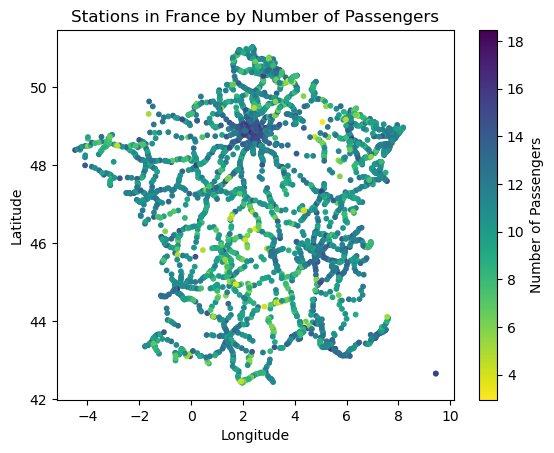

In [7]:

plt.scatter(
    no_outliers_table['lon_gare'], 
    no_outliers_table['lat_gare'], 
    s=10,  # Increase size for visibility
    c=np.log(no_outliers_table['total_voyageurs_2022']),  # Color based on number of passengers
    cmap='viridis_r'  # Use a perceptible color map
)
plt.colorbar(label='Number of Passengers')  # Add color legend
plt.title("Stations in France by Number of Passengers")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()